In [1]:
from my_methods import *

#### En este punto monto la red con Cytoscape y exporto los clusters en data/Clusters/

In [2]:
os.mkdir('Testing_networks/to_analyze')
os.mkdir('Testing_networks/clusters_parsed')
nodes = 10
for i in os.listdir('Testing_networks/Clusters/'):
    if i[-3:]=='txt':
        with open(f'Testing_networks/Clusters/{i}', 'r') as read:
            with open('Testing_networks/clusters_parsed/'+i[:-4]+'.txt', 'w') as write:
                l = read.readlines()
                for element in l[12:]:
                    write.writelines(f'{element}')
        df = pd.read_table('Testing_networks/clusters_parsed/'+i)
        df = df.loc[df['Nodes']>nodes]
        df.reset_index(inplace=True, drop=False)
        os.mkdir('Testing_networks/to_analyze/'+i[:-4])
        for n in range(len(df)):
            with open('Testing_networks/to_analyze/'+i[:-4]+f'/{n}', 'w') as clus:
                list_nodes = list(map(lambda x: x.split('-')[0].upper(), df.loc[n, 'Node IDs'].split(', ')))
                for element in list_nodes:
                    clus.writelines(f'{element}'+'\n')

In [3]:
!./enrichment.sh Testing_networks/to_analyze



tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe
tail: write error: Broken pipe




































tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe













































ERROR: only 0.6666666666666666 of genes/proteins in the study are found in the background population. Please check.

















tail: error writing 'standard output': Broken pipe
tail: error writing 'standard output': Broken pipe


























tail: error writing 'standard output': Broken pipe










































In [1]:
def integrate_clusters_df(folder, nrows=2):
    df = pd.DataFrame()
    for file in os.listdir(folder):
        try:
            df_ = pd.read_table(folder+file, nrows=nrows)
            df = pd.concat([df, df_])
        except:
            pass  
    li = list(df.index)
    li = sorted(list(range(int(len(li)/len(set(li)))))*len(set(li)))
    df.reset_index(inplace=True, drop=False)
    df.drop(columns={'index'}, inplace=True)
    return df


# Crea un archivo en la carpeta 'final', donde hay una concatenacion de los dataframes con resultados
path = 'Testing_networks/to_analyze/'
for i in os.listdir(path):
    df = integrate_clusters_df(path+i+'/results_parsed/')
    os.mkdir(path+i+'/final')
    ##########################
    df['name'] = list(map(lambda x: x.strip(), df['name']))
    # Revisar esto
    df['p_fdr_bh'] = df['p_fdr_bh'].astype('float64')
    df.to_csv(path+i+'/final/'+i+'.csv')

In [5]:
# Crear un reporte final de todos los clusters con un solo dataframe

# Funcion que selecciona en una Serie de Pandas con terminos ontologicos repetidos solo el termino repetido con menor score
def select_minor_enrichment(df):
    df = copy.deepcopy(df)
    final_df = pd.DataFrame(columns=df.columns,dtype=np.float64)
    for i in range(len(df)):
        line = df.loc[i]
        if line['name'] not in list(final_df['name']):
            final_df.loc[len(final_df)] = list(line)
        elif line['p_fdr_bh'] < float(final_df.loc[final_df['name']==line['name']]['p_fdr_bh']):
            final_df.loc[final_df['name']==line['name']]['p_fdr_bh'] = line['p_fdr_bh']
    return final_df


In [11]:
ExE_mul = pd.DataFrame()
NxN_mul = pd.DataFrame()
global_mul = pd.DataFrame()

ExE_add = pd.DataFrame()
NxN_add = pd.DataFrame()
global_add = pd.DataFrame()

path='Testing_networks/to_analyze/'
for folder in os.listdir(path):
    df_ = pd.read_csv(path+folder+f'/final/{folder}.csv')
    df_ = df_[['GO', 'NS', 'enrichment', 'name', 'ratio_in_study', 'ratio_in_pop', 'depth', 'study_count', 'study_items', 'p_fdr_bh']]
    df_['ratio_in_pop'] = df_['ratio_in_pop'].apply(lambda x: int(x.split('/')[0])/int(x.split('/')[1]))
    df_['ratio_in_study'] = df_['ratio_in_study'].apply(lambda x: int(x.split('/')[0])/int(x.split('/')[1]))
    df_ = select_minor_enrichment(df_)
    #########################################
    if folder=='ExE_mul_clusters':
        ExE_mul = df_
    if folder=='NxN_mul_clusters':
        NxN_mul = df_
    if folder=='global_mul_clusters':
        global_mul = df_
    #########################################
    if folder=='ExE_add_clusters':
        ExE_add = df_
    if folder=='NxN_add_clusters':
        NxN_add = df_
    if folder=='global_add_clusters':
        global_add = df_
        
#########################################################

def ontology(df, title='No Title', save=False, path='default.png'):
    plt.style.use('ggplot')
    plt.figure(figsize=(10,8))
    if len(df)>25:
        df.sort_values('p_fdr_bh', inplace=True)
        df = df[:25]    
    # w = plt.scatter(df['ratio_in_study'], df['name'], s=list(map(lambda x: x*4000, df['ratio_in_pop'])), c=df['p_fdr_bh'], cmap='winter_r', edgecolors="black")
    w = plt.scatter(df['ratio_in_study'], df['name'], s=list(map(lambda x: x*10, df['study_count'])), c=df['p_fdr_bh'], cmap='winter_r', edgecolors="black")
    a = plt.xticks(np.arange(0,1.1,0.1))
    plt.xlabel('Razon de genes en estudio', fontsize=15)
    plt.ylabel('Terminos GO', fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=18)
    clb = plt.colorbar()
    plt.clim(0, 0.05)
    clb.set_label('p-valor', fontsize=15)
    if save:
        plt.savefig(path, bbox_inches='tight')

/tmp/ipykernel_3512/316265958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[final_df['name']==line['name']]['p_fdr_bh'] = line['p_fdr_bh']
/tmp/ipykernel_3512/316265958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[final_df['name']==line['name']]['p_fdr_bh'] = line['p_fdr_bh']
/tmp/ipykernel_3512/316265958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

/tmp/ipykernel_3512/1720156502.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


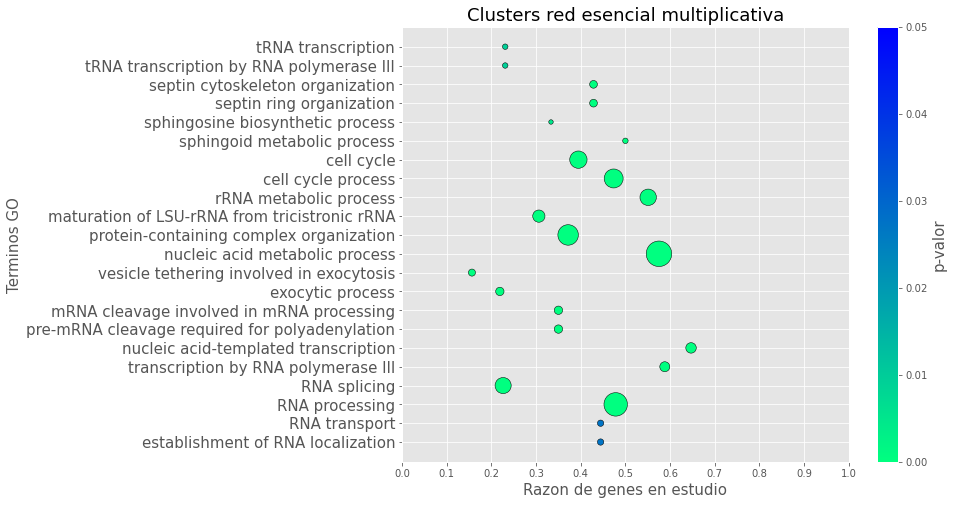

In [12]:
ExE_mul.loc[12, 'name'] = ExE_mul.loc[12, 'name'][:45]

ontology(ExE_mul, title='Clusters red esencial multiplicativa', save=True, path='img/ExE_mul_ontology.png')

/tmp/ipykernel_3512/1720156502.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


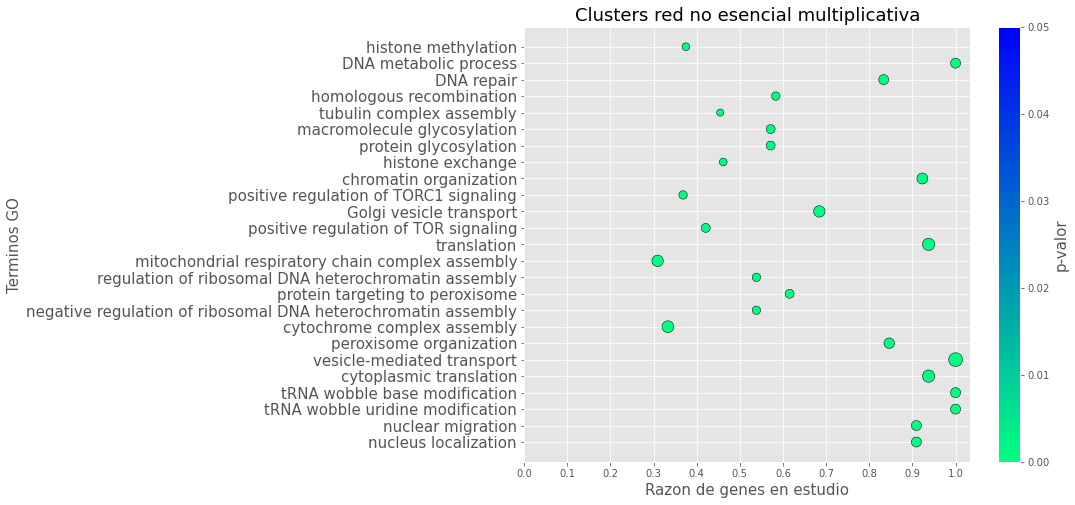

In [13]:
ontology(NxN_mul, title='Clusters red no esencial multiplicativa', save=True, path='img/NxN_mul_ontology.png')

/tmp/ipykernel_3512/1720156502.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


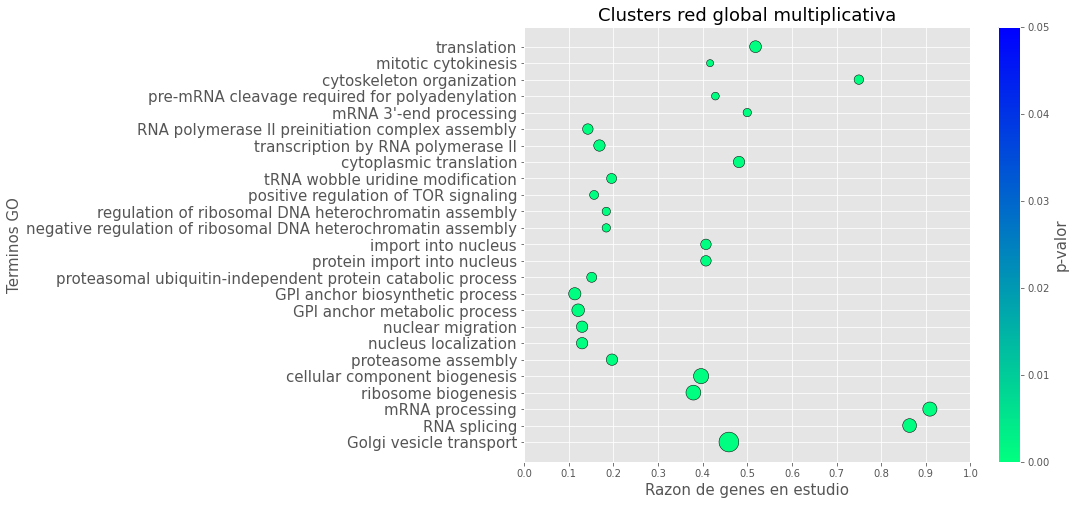

In [14]:
ontology(global_mul, title='Clusters red global multiplicativa', save=True, path='img/global_mul_ontology.png')

/tmp/ipykernel_3512/1720156502.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


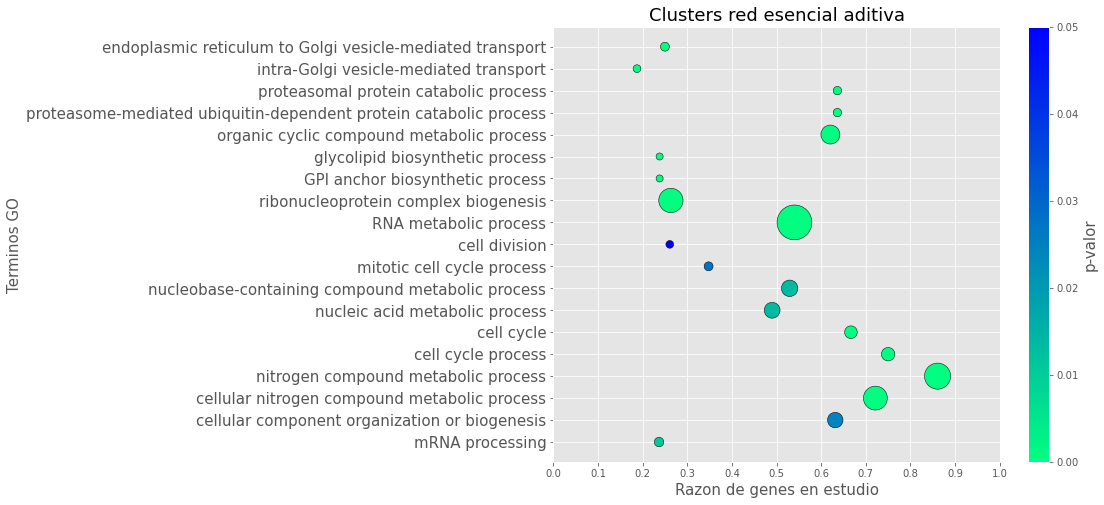

In [15]:
ontology(ExE_add, title='Clusters red esencial aditiva', save=True, path='img/ExE_add_ontology.png')

/tmp/ipykernel_3512/1720156502.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


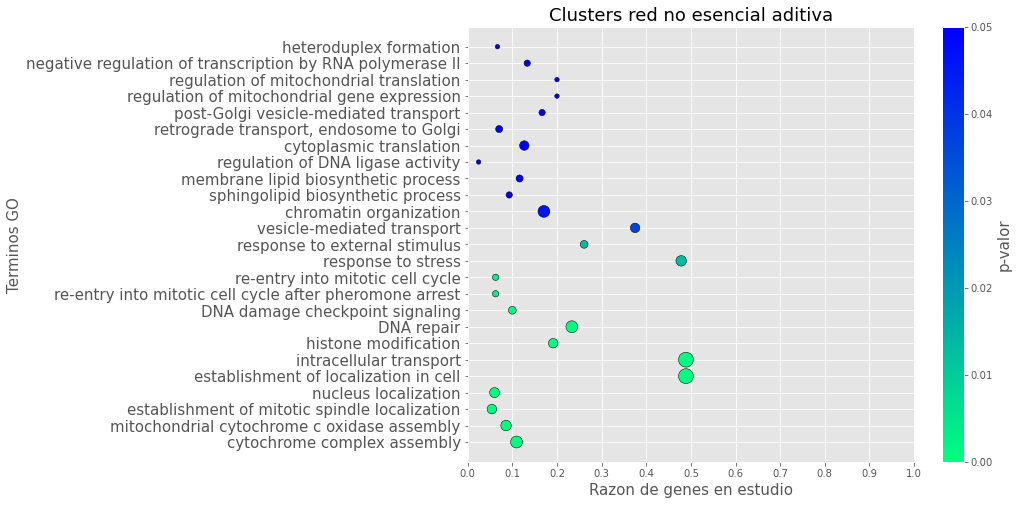

In [16]:
ontology(NxN_add, title='Clusters red no esencial aditiva', save=True, path='img/NxN_add_ontology.png')

/tmp/ipykernel_3512/1720156502.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  clb = plt.colorbar()


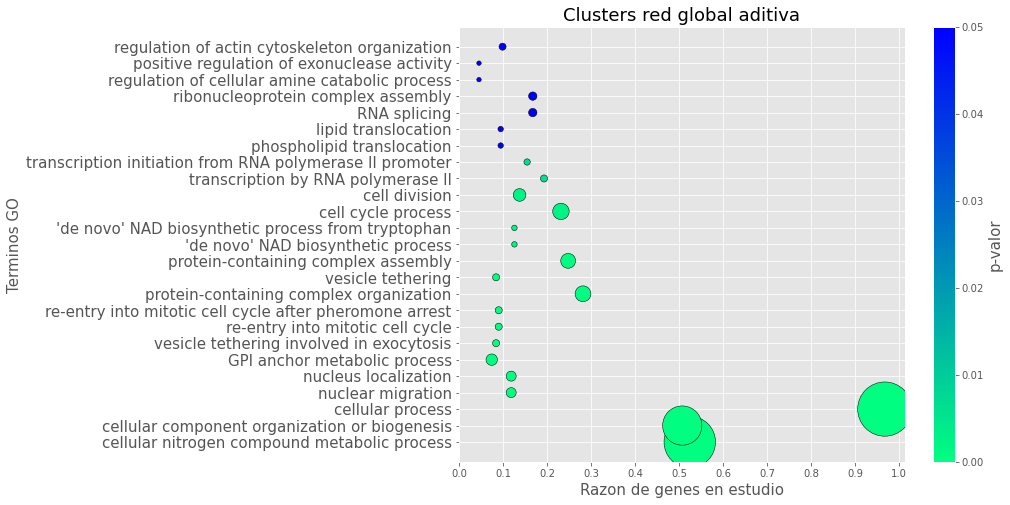

In [17]:
ontology(global_add, title='Clusters red global aditiva', save=True, path='img/global_add_ontology.png')